In [1]:
import pickle

In [2]:
import numpy as np

In [3]:
import os

In [4]:
from PIL import Image

In [5]:
import matplotlib.pyplot as plt

In [6]:
import shutil

In [7]:
import math

In [8]:
from matplotlib import pyplot as plt

In [9]:
from PIL import Image

In [10]:
import numpy as np

In [11]:
from skimage import transform

In [12]:
import tensorflow.keras

In [13]:
from tensorflow.keras import optimizers

In [14]:
from tensorflow.keras import models

In [15]:
from tensorflow.keras.models import load_model

In [16]:
from tensorflow.keras import layers

In [17]:
from tensorflow.keras.layers import Embedding, LSTM, add, Concatenate, Reshape, concatenate, Bidirectional

In [18]:
from tensorflow.keras.layers import Flatten, Dense, Input, Layer

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout

In [20]:
from tensorflow.keras.preprocessing import image

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
original_dataset_dir_soil = 'dataset/train/soil'
original_dataset_dir_soybean = 'dataset/train/soybean'
original_dataset_dir_grass = 'dataset/train/grass'
original_dataset_dir_weed = 'dataset/train/broadleaf'

In [23]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150,150,3))) 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten()) 
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu')) 
    model.add(layers.Dense(4, activation='softmax')) 
    return model

In [24]:
model = create_model()

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_directory('Dataset/train', target_size=(150, 150), color_mode="rgb", batch_size=92,
        class_mode='categorical')

Found 9202 images belonging to 4 classes.


In [30]:
validation_generator = test_datagen.flow_from_directory(
        "Dataset/validation",
        target_size=(150, 150),
        color_mode="rgb",
        batch_size=31,
        class_mode='categorical')

Found 3067 images belonging to 4 classes.


In [31]:
test_generator = test_datagen.flow_from_directory(
        "dataset/test",
        target_size=(150, 150),
        color_mode="rgb",
        batch_size=31,
        class_mode='categorical')

Found 3067 images belonging to 4 classes.


In [32]:
training_samples =9202
batch_size_training_generator=92
validation_samples =3067
batch_size_validation_generator=31

In [33]:
model = load_model('model_weedcrops.h5')

In [34]:
can_train = False

In [35]:
if can_train:
    history = model.fit(
      train_generator,
      steps_per_epoch=math.ceil(training_samples/batch_size_training_generator),
      epochs=15,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_samples/batch_size_validation_generator))
    model.save("Crop-Type-Detection-CD-Model.keras")
    with open("Crop-Type-Detection-CD-History.pickle", "wb") as fs:
        pickle.dump(history.history, fs)
    history = history.history
else:
    model = load_model("Crop-Type-Detection-CD-Model.keras")
    with open("Crop-Type-Detection-CD-History.pickle", "rb") as fs:
        history = pickle.load(fs)

In [36]:
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

In [37]:
epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

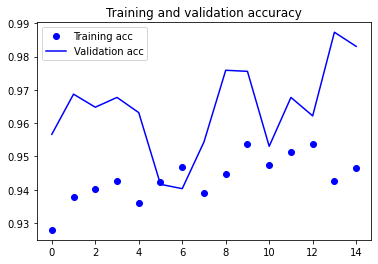

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

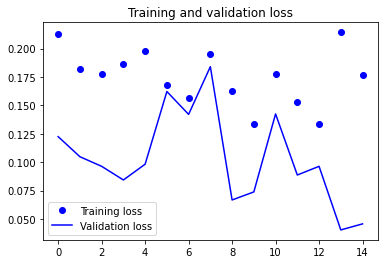

In [39]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [40]:
test_samples =3067
batch_size_test=31

In [41]:
score= model.evaluate_generator(test_generator, steps = math.ceil(test_samples/batch_size_test))

C:\Users\nagan\AppData\Local\Temp\ipykernel_4952\889440215.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score= model.evaluate_generator(test_generator, steps = math.ceil(test_samples/batch_size_test))


In [42]:
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 98.5%
